### **Siyu (Suri) Sun**, ssun27@ncsu.edu / suri.sun@duke.edu, 200558877. ###
### **GIS712** *Final Project* ####

## __Understanding Surface Water Change as Part of a Savannah Elephant Connectivity Project__
#### __*Abstract*__
In southern Africa, the spatial distribution of the savannah elephant (Loxodonta africana) is very uneven. Most abundant population is mainly found in protected areas that are very isolated from one another, and individual movements are also potentially impeded by barriers such as fences and urban settlements. Restoring connectivity among different elephant populations has therefore become critical. The final project of a Special Topics course at Duke University aims at answering part of this question by mapping existing barriers along pathways where elephants may travel, with the assumption that the animals will mainly move along rivers due to huge demand for water resources. Stemmed from their work, this project attempts to strengthen this primary assumption by understanding the spatial and temporal changes of open water extent in the same study area. Twelve PlanetScope images, each representing a selected date of a month in the past year, were processed to calculate the normalized difference water index (NDWI) and extract water pixels under selected optimal thresholds. The area of surface water was the smallest in Dec 2022 and peaked in Mar 2023. Water was present in the border river only during the wet months and dried out thereafter. No significant number of barriers were found near the river except for several small croplands and a rural settlement. This suggests a likely elephant-friendly pathway along the river, but in order to fully understand connectivity issues, future work is still needed to improve water-mapping methods, ground-truth the magnitude of barrier impacts, and understand migratory patterns and habits of individual elephants. 
#### __*Introduction*__
The savannah elephants (Loxodonta africana) are one of the two elephant species found in Africa and are among the most well-known large mammals on the continent. The southern Africa region, in particular, is home to nearly 80% of the world’s savannah elephant population (Robson et al., 2017). However, most of these populations are found in protected national park areas that are isolated from each other (Huang et al., 2022). The spatial distribution of these elephants, as a result, is uneven across the large geographic range, with locally over-abundant numbers found in certain places while close to extinction in other regions (Blake and Hedges, 2004). Most of the current elephant movements are also confined within the boundary of individual parks or adjacent protected areas (Huang et al. 2022). 

The pattern of savannah elephant distribution and movement has thus sparked interest in understanding where potential corridors are to be improved (Van Aarde et al., 2007). Roever et al. (2013), for example, examined the functional connectivity flow in relation to the conservation networks in a study area running from western to the eastern coast. While including most major elephant population clusters, their area of interest excluded the Limpopo population around Kruger National Park along the juncture of South Africa and Mozambique (Roever et al., 2013). Huang et al. (2022) also pointed out the Limpopo cluster as a typical example of isolated population. In their case study analyses, they suggested the necessity to use the Limpopo as a starting point of connecting isolated elephant populations to other patches in the north (Huang et al. 2022). 

In response to the need of mapping savannah elephant connectivity, the ENVIRON590 Special Topics – Big Cats (STBC) class are working on a final project to understand whether elephants in Kruger National Park are able to move to protected areas in the Northwest. The main goal of the STBC project is to identify and map potential barriers (e.g. fences and urban areas) along the borderlines of South Africa, Mozambique, Zimbabwe, and Botswana. The project assumed that the elephants will mainly move along rivers, given that water sources are one of the few critical determinants of where elephants will go, especially during dry seasons (Shrader et al., 2010). Nonetheless, the locations of water sources in the study area remains unknown. While water sources are critical factors that guide elephant movements, the changes of water with the alternate wet and dry seasons may also influence elephant movements. Thus, delineating spatial and temporal pattern of surface water change is critical in strengthening the assumption and will add additional information to the original project.  

Surface water variability has been extensively mapped using various high-resolution remotely sensed images, including datasets provided by the Planet Lab. Cooley et al. (2017), for instance, used the CubeSat imagery to track sub-seasonal dynamics of surface water inundation in the Yukon Flats of Alaska. Similarly, Hondula et al. (2021), computed changes of forested wetlands extent from PlanetScope Imagery in their efforts to estimate methane emissions, with the ability to quantify changes of wetlands extent less than 1,000 m2. These examples have proved the capabilities of high-resolution Planet images in delineating surface water extent that are useful to answer bigger ecological questions. 

As a result, this project will examine surface water extent in a similar fashion to help understand potential directions of elephant movements, serving as an extension of the STBC class project. With a focus on finer-scale analysis, the main objective of this project is to answer the questions below:
1. What are the temporal and spatial changes of surface water within the study area?
2. What is their spatial relationship with the potential barriers mapped in the STBC class project?

#### __*Study Area*__
The study area of this project is a 459-km<sup>2</sup> rectangle bounded by -21°24'26.3398" ~ -21°35'53.4489" latitude and 28°01'12.1345" ~ 27°48'35.9095" longitude. It sits on the borderline between Botswana and Zimbabwe, which runs along the river that meanders across the right side of the region and joins the Sashe River on the lower right corner. On the left side, there is a reservoir lake impounded by the Dikgatlhong Dam along the Sashe (lower) and Tati (upper) River. This region is amid patches of protected areas (green polygons) and will be a key pathway if elephants are to move northeastward from Kruger National Park (lower-right purple dot) to protected areas surrounding Kasane (upper-left purple dot), such as Chobe and Hwang. The area is also representative of both natural and artificial water bodies, and the conjunction of the rivers and the reservoir also makes it a critical turning point that may influence the direction to which elephants may proceed. 

<center><img src="imgs/StudyArea_points.png" width="750"/></center>

#### __*Methods and Results*__
The following packages and modules were imported to allow all subsequent image processing, analyses, and data visualization:

In [1]:
# import modules
from glob import glob
import rasterio 
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import threshold_otsu

# for customizing legend:
import matplotlib.patches as mpatches
import matplotlib as mpl

# for plotting inset maps
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector

import pandas as pd
import os

This project uses PlanetScope imagery downloaded from the Planet website (Planet Team, 2017). Daily images were queried for the past 12 months from December 2022 to November 2023, with filters applied to keep only those with 100% area coverage and <10% cloud cover. Qualified images were selected for each month from dates between the 5th and 15th to ensure uniform temporal intervals. An exception was the selection of the Dec 1st 2022 image, as none of the other images between Dec 5th and 15th met the baseline criteria. Due to quota limits on downloadable Planet scenes, only one image per month was chosen for download, resulting in 12 images in total. All images were downloaded as 4-band composite files and were stored in folders named with their dates:

In [2]:
# list all date folders
dates = os.listdir(os.path.join("data"))
print(dates)

# obtain paths for all raster images
PS_files = glob(os.path.join("data", "202*", "composite.tif"))
print(PS_files)

['20221201', '20230110', '20230206', '20230309', '20230407', '20230507', '20230605', '20230707', '20230808', '20230910', '20231007', '20231111']
['data\\20221201\\composite.tif', 'data\\20230110\\composite.tif', 'data\\20230206\\composite.tif', 'data\\20230309\\composite.tif', 'data\\20230407\\composite.tif', 'data\\20230507\\composite.tif', 'data\\20230605\\composite.tif', 'data\\20230707\\composite.tif', 'data\\20230808\\composite.tif', 'data\\20230910\\composite.tif', 'data\\20231007\\composite.tif', 'data\\20231111\\composite.tif']


These images were opened using rasterio in the code chunk below. The green and near infrared (NIR) bands were converted to float numbers to calculate the normalized difference water index (NDWI), an index developed to obtain open surface water extent (McFeeters, 1996). The Otsu threshold from the scikit-image package was computed for each month's image to generate a binary raster separating water from non-water areas. The cell size was also obtained from the metadata for calculating water areas in subsequent steps:

In [3]:
## read in images in a for loop
# create new lists to store source images, NDWI, Otsu thresholds, and Otsu binarg images:
PS_imgs = []
PS_ndwi = []
PS_otsu = []
PS_binary = []

for file in PS_files:

    # open images
    src = rasterio.open(file)
    PS_imgs.append(src)

    # read in green and NIR bands and convert to float
    green = src.read(2).astype('f4')
    nir = src.read(4).astype('f4')

    # calculate NDWI and append to ndwi list
    ndwi = (green - nir) / (green + nir)
    PS_ndwi.append(ndwi)

    # calculate Otsu threshold
    otsu = threshold_otsu(ndwi[~np.isnan(ndwi)])
    PS_otsu.append(otsu)
    
    # create binary images
    binary = ndwi > otsu
    binary = binary.astype(int)
    PS_binary.append(binary)

# Obtain metadata
# PS_imgs[0].meta
    # cell size: 3*3

C:\Users\ss1385\AppData\Local\Temp\ipykernel_11132\4249504409.py:19: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (green - nir) / (green + nir)


In [38]:
## write out all otsu binary images, as needed
# for i in dates:
#     datenum = dates.index[i]
#     kwargs = PS_imgs[datenum].meta
#     kwargs['count'] = 1
#     out_path = os.path.join(os.getcwd(), "processed", "otsu_binary", f"Otsu_binary_{dates[datenum]}.tif")
#     with rasterio.open(out_path, 'w', **kwargs) as file:
#         file.write(PS_binary[datenum].astype(rasterio.uint16), 1)
#     file.close()

## Write out user-specified otsu binary image, as needed
# datenum = dates.index("20230910")
# kwargs = PS_imgs[datenum].meta
# kwargs['count'] = 1
# out_path = os.path.join(os.getcwd(), "processed", "otsu_binary", f"Otsu_binary_{dates[datenum]}.tif")
# with rasterio.open(out_path, 'w', **kwargs) as file:
#     file.write(PS_binary[datenum].astype(rasterio.uint16), 1)
# file.close()

For each image, a grid of three figures can be plotted using the code below to show the NDWI values, histogram of NDWI with the Otsu threshold, and the Otsu binary image:

C:\Users\ss1385\AppData\Local\Temp\ipykernel_11132\837392959.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[0] = plt.subplot(1, 3, 1, adjustable='box')
C:\Users\ss1385\AppData\Local\Temp\ipykernel_11132\837392959.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')


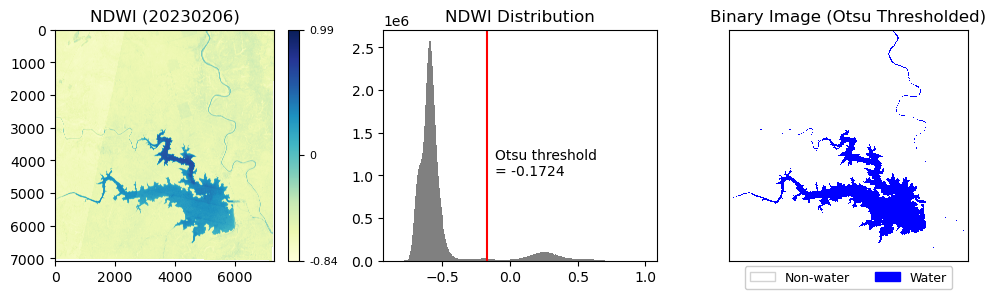

In [4]:
## plot images
# specify a date in parenthesis
datenum = dates.index('20230206')

fig, axes = plt.subplots(ncols=3, figsize=(12, 3))
# create axis to subplot
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')
# ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

# plot the NDWI image
pos = ax[0].imshow(PS_ndwi[datenum], cmap='YlGnBu', vmin=np.nanmin(PS_ndwi[datenum]), 
                   vmax=np.nanmax(PS_ndwi[datenum]), aspect="auto")
ax[0].set_title(f'NDWI ({dates[datenum]})')
cbar = fig.colorbar(pos, ax=ax[0])
cbar.set_ticks(ticks=[np.nanmin(PS_ndwi[datenum]), 0, np.nanmax(PS_ndwi[datenum])], 
               labels=[f'{np.nanmin(PS_ndwi[datenum]):.2f}', '0', f'{np.nanmax(PS_ndwi[datenum]):.2f}'])
cbar.ax.tick_params(labelsize=8) 

# plot the NDWI histogram
ax[1].hist(PS_ndwi[datenum].ravel(), color = 'grey', bins=256)
ax[1].set_title('NDWI Distribution')
ax[1].axvline(PS_otsu[datenum], color='r')
ax[1].annotate('Otsu threshold\n= {0}'.format(str(round(PS_otsu[datenum], 4))), xy=(PS_otsu[datenum]+0.06, 1E6))

# plot the water and non-water binary images
colors = ['white', 'blue'] # set binary colors
bounds = [0,1] # set color bounds
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
pos2 = ax[2].imshow(PS_binary[datenum], interpolation='none', cmap=cmap, norm=norm) # cmap=plt.cm.gray
ax[2].set_title('Binary Image (Otsu Thresholded)')
# set visibility of axes
a = plt.gca()
xax = a.axes.get_xaxis()
xax = xax.set_visible(False)
yax = a.axes.get_yaxis()
yax = yax.set_visible(False)
# create legend
water = mpatches.Patch(facecolor=colors[0], edgecolor="lightgrey", label='Non-water')
nonwater = mpatches.Patch(color=colors[1], label='Water')
ax[2].legend(handles=[water, nonwater], 
             loc="lower center", 
             bbox_to_anchor=[0.5, -0.15], 
             ncol=2, fontsize=9, 
             frameon=True, framealpha=1)

plt.show()

The thresholds were then manually adjusted so that the water extent on the binary images match the real surface water extent as observed in the true-color images. This comparison between raw PlanetScope and binary images was completed in ArcGIS Pro. Side-by-side figures can also be generated to compare the binary images created using Otsu and customized thresholds:

C:\Users\ss1385\AppData\Local\Temp\ipykernel_11132\3470272937.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[0] = plt.subplot(1, 3, 1, adjustable='box')
C:\Users\ss1385\AppData\Local\Temp\ipykernel_11132\3470272937.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box')


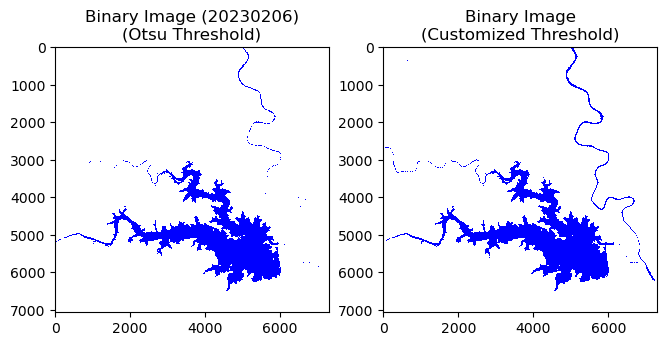

In [5]:
## Manually adjust threshold
# datenum = dates.index('20230605') ## set another date, if different from the one specified in the above code chunk
customize = -0.32 ## customize threshold

# Create binary image with customized threshold
binary_cm = PS_ndwi[datenum] > customize
binary_cm = binary_cm.astype(int)

# Plotting binary images for Otsu and customized side by side
fig, axes = plt.subplots(ncols=2, figsize=(12,4.5))

ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(PS_binary[datenum], interpolation="none", cmap=cmap)
ax[0].set_title(f'Binary Image ({dates[datenum]})\n(Otsu Threshold)')

ax[1].imshow(binary_cm, cmap=cmap)
ax[1].set_title('Binary Image\n(Customized Threshold)')

plt.show()

An optimal threshold was then selected for each image, if not the Otsu threshold, and the water areas were calculated by multiplying the pixel size with the total number of water pixels under the chosen optimal thresholds. The thresholds used and a table of the calculated water areas (in km<sup>2</sup>) are shown below:

In [6]:
# Final optimal thresholds selected for each date
PS_customize = {'20221201': -0.235,
                '20230110': -0.27, 
                '20230206': -0.32, 
                '20230309': -0.35, 
                '20230407': -0.23, 
                '20230507': -0.2290, 
                '20230605': -0.1834, 
                '20230707': -0.1081, 
                '20230808': -0.0868, 
                '20230910': -0.2112,
                '20231007': -0.1521,
                '20231111': -0.2231}

In [7]:
## Calculate optimal estimation of water areas
# create lists to store binary images with optimal thresholds and water areas
PS_binary_cm = []
PS_water_areas = {} # dictionary

# Store customize-thresholded binary images into a list
for date in dates:
    datenum = dates.index(date) ## obtain the index of specified date in the dates list
    customize = PS_customize[date] ## obtain customized threshold of the specified date
    
    # Create binary image with customized threshold
    binary_cm = PS_ndwi[datenum] > customize
    binary_cm = binary_cm.astype(int)
    PS_binary_cm.append(binary_cm)

    # Calculate water areas in square kilometers
    water_pixels = np.count_nonzero(binary_cm == 1)
    PS_water_area = water_pixels * 3.0 * 3.0 * 1/1000000

    # Store areas in a dictionary
    PS_water_areas[date] = PS_water_area

# print(PS_water_areas)

# convert dictionary to a dataframe
area_df = pd.DataFrame(PS_water_areas.items(), columns=['Date', f'Water area (km^2)'])
area_df['Date'] = pd.to_datetime(area_df['Date']) # convert date to date format
area_df

,Date,Water area (km^2)
0,2022-12-01,39.143664
1,2023-01-10,41.493951
2,2023-02-06,44.492706
3,2023-03-09,45.608490
4,2023-04-07,42.338673
5,2023-05-07,41.330736
6,2023-06-05,40.588650
7,2023-07-07,40.463343
8,2023-08-08,39.913182
9,2023-09-10,40.368708


In [51]:
## Write out all customized binary images, as needed
# for i in dates:
#     datenum = dates.index[i]
#     kwargs = PS_imgs[datenum].meta
#     kwargs['count'] = 1
#     out_path = os.path.join(os.getcwd(), "processed", "customized_binary", f"Ctm_binary_{dates[datenum]}.tif")
#     with rasterio.open(out_path, 'w', **kwargs) as file:
#         file.write(PS_customize[datenum].astype(rasterio.uint16), 1)
#     file.close()

## Write our user-specified binary image, as needed
# datenum = dates.index("20230309")
# kwargs = PS_imgs[datenum].meta
# kwargs['count'] = 1
# out_path = os.path.join(os.getcwd(), "processed", "customized_binary", f"Ctm_binary_{dates[datenum]}.tif")
# with rasterio.open(out_path, 'w', **kwargs) as file:
#     file.write(PS_binary_cm[datenum].astype(rasterio.uint16), 1)
# file.close()

A time-series figure is plotted from the water inundation areas:

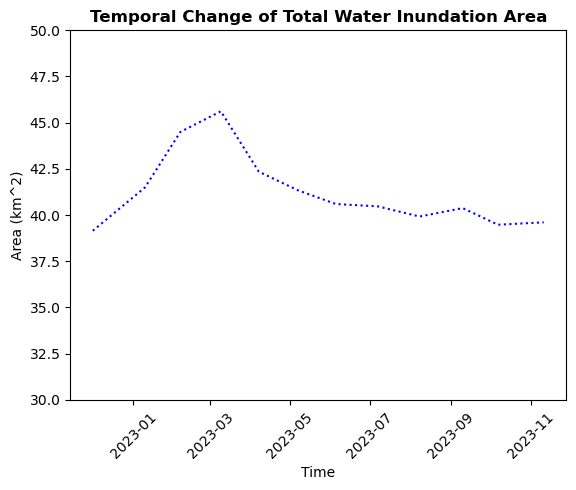

In [9]:
# create a time series plot
plt.plot(area_df['Date'], area_df['Water area (km^2)'], linestyle='dotted', color='blue')
plt.ylim(30, 50)
plt.title('Temporal Change of Total Water Inundation Area', fontweight="bold")
plt.xlabel('Time')
plt.ylabel('Area (km^2)')
plt.xticks(rotation=45)
plt.show()

Binary water rasters were also added together to calculate inundation frequency in each pixel for three time periods: \
1) Dec 2022-Mar 2023, indicating shift from dry to wet months: 

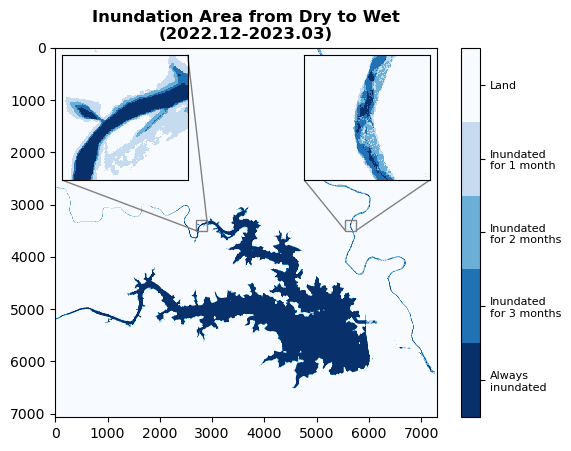

In [10]:
## combine images from dry to wet (images from 2022/12 to 2023/03)
sum_wet = PS_binary_cm[0]
for i in range(1,4):
    sum_wet = sum_wet + PS_binary_cm[i]
# print(np.max(sum)) 
# sum_wet = sum_wet.astype('float')
# sum_wet[sum_wet == 0] = 'nan'

cmap = plt.cm.get_cmap('Blues', 5)  # set discrete colormap

fig, ax1 = plt.subplots(1,1)
series = ax1.imshow(sum_wet, cmap=cmap)
axins = zoomed_inset_axes(ax1, 12, loc=2)
axins.imshow(sum_wet, cmap=cmap, interpolation="nearest", origin="lower")
axins1 = zoomed_inset_axes(ax1, 12, loc=1)
axins1.imshow(sum_wet, cmap=cmap, interpolation="nearest", origin="lower")

# sub region of the original image for axins
axins.set_xlim(2700, 2900)
axins.set_ylim(3500, 3300)
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)

# sub region of the original image for axins1
axins1.set_xlim(5550, 5750)
axins1.set_ylim(3500, 3300)
axins1.axes.get_xaxis().set_visible(False)
axins1.axes.get_yaxis().set_visible(False)

# extend indicator
## define a new mark_inset function so that different locations can be selected when connecting the 
## extent indicator to the inset map
## source: https://stackoverflow.com/questions/45076945/matplotlib-mark-inset-with-different-edges-for-axes
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, axins, loc1a=1, loc1b=4, loc2a=3, loc2b=2, fc="none", ec="0.5")
mark_inset(ax1, axins1, loc1a=4, loc1b=1, loc2a=3, loc2b=2, fc="none", ec="0.5")

ax1.set_title('Inundation Area from Dry to Wet\n(2022.12-2023.03)', fontweight="bold")
cbar = fig.colorbar(series, ticks=[np.min(sum_wet), 1, 2, 3, np.max(sum_wet)])
cbar.ax.invert_yaxis()
cbar.ax.tick_params(labelsize=8)
tick_locs = (np.arange(5) + 0.5)*(5-1)/5
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(['Land', 'Inundated\nfor 1 month', 'Inundated\nfor 2 months', 
                         'Inundated\nfor 3 months', 'Always\ninundated'])

plt.show()

2) Mar 2023 - Nov 2023, indicating shift from wet to dry months: 

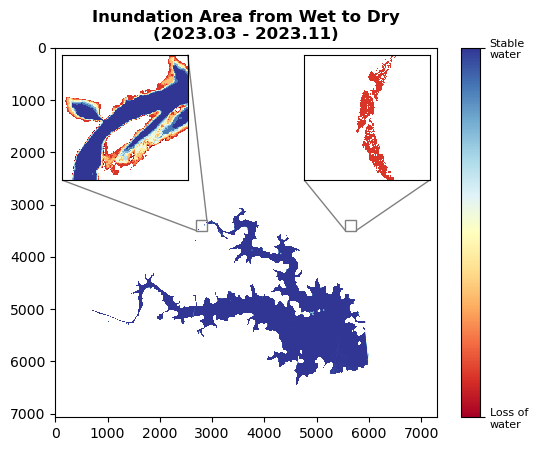

In [13]:
## combine images from wet to dry (i.e. images from 2022/03 to 2023/11)
sum_dry = PS_binary_cm[3]
for i in range(3,12):
    sum_dry = sum_dry + PS_binary_cm[i]
# print(np.max(sum)) 
sum_dry = sum_dry.astype('float')
sum_dry[sum_dry == 0] = 'nan'

cmap = plt.cm.get_cmap('RdYlBu')  # set colormap

fig, ax1 = plt.subplots(1,1)
series = ax1.imshow(sum_dry, cmap=cmap)
axins = zoomed_inset_axes(ax1, 12, loc=2)
axins.imshow(sum_dry, cmap=cmap, interpolation="nearest", origin="lower")
axins1 = zoomed_inset_axes(ax1, 12, loc=1)
axins1.imshow(sum_dry, cmap=cmap, interpolation="nearest", origin="lower")

# sub region of the original image for axins
axins.set_xlim(2700, 2900)
axins.set_ylim(3500, 3300)
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)

# sub region of the original image for axins1
axins1.set_xlim(5550, 5750)
axins1.set_ylim(3500, 3300)
axins1.axes.get_xaxis().set_visible(False)
axins1.axes.get_yaxis().set_visible(False)

# extend indicator
## define a new mark_inset function so that different locations can be selected when connecting the 
## extent indicator to the inset map
## source: https://stackoverflow.com/questions/45076945/matplotlib-mark-inset-with-different-edges-for-axes
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, axins, loc1a=1, loc1b=4, loc2a=3, loc2b=2, fc="none", ec="0.5")
mark_inset(ax1, axins1, loc1a=4, loc1b=1, loc2a=3, loc2b=2, fc="none", ec="0.5")

ax1.set_title('Inundation Area from Wet to Dry\n(2023.03 - 2023.11)', fontweight = "bold")
cbar = fig.colorbar(series, ticks=[1,10])
# cbar.ax.invert_yaxis()
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_yticklabels(['Loss of\nwater', 'Stable\nwater'])

plt.show()

and 3) Dec 2022 - Nov 2023, which is the entire year:

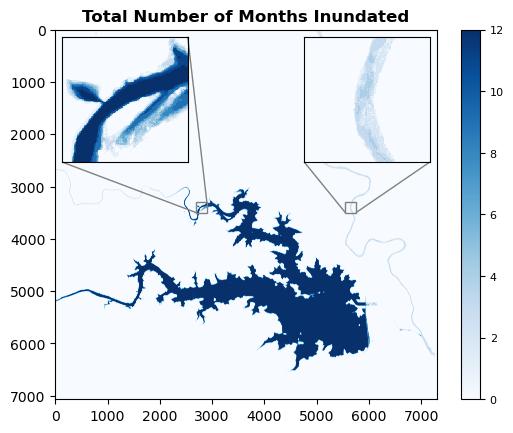

In [17]:
# combine all images (i.e. images from 2022/12 to 2023/03)
sum_all = PS_binary_cm[0]
for i in range(1,12):
    sum_all = sum_all + PS_binary_cm[i]
# print(np.max(sum)) 

cmap = plt.cm.get_cmap('Blues')  # set continuous colormap

fig, ax1 = plt.subplots(1,1)
series = ax1.imshow(sum_all, cmap=cmap)
axins = zoomed_inset_axes(ax1, 12, loc=2)
axins.imshow(sum_all, cmap=cmap, interpolation="nearest", origin="lower")
axins1 = zoomed_inset_axes(ax1, 12, loc=1)
axins1.imshow(sum_all, cmap=cmap, interpolation="nearest", origin="lower")

# sub region of the original image for axins
axins.set_xlim(2700, 2900)
axins.set_ylim(3500, 3300)
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)

# sub region of the original image for axins1
axins1.set_xlim(5550, 5750)
axins1.set_ylim(3500, 3300)
axins1.axes.get_xaxis().set_visible(False)
axins1.axes.get_yaxis().set_visible(False)

# extend indicator
## define a new mark_inset function so that different locations can be selected when connecting the 
## extent indicator to the inset map
## source: https://stackoverflow.com/questions/45076945/matplotlib-mark-inset-with-different-edges-for-axes
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, axins, loc1a=1, loc1b=4, loc2a=3, loc2b=2, fc="none", ec="0.5")
mark_inset(ax1, axins1, loc1a=4, loc1b=1, loc2a=3, loc2b=2, fc="none", ec="0.5")

ax1.set_title('Total Number of Months Inundated', fontweight="bold")
cbar = fig.colorbar(series)
cbar.ax.tick_params(labelsize=8)
# cbar.set_ticks([tick_locs])

plt.show()

As shown in the table and the time-series plot above, the total inundation area within the study region fluctuated between December 2022 and November 2023. It reached the smallest in on Dec 1st, 2022 (39.14 km<sup>2</sup>) and peaked in on Mar 9th, 2023 (45.61 km<sup>2</sup>). According to the time-series raster images, most of the reservoir water is permanent throughout the year, with subtle increase in wet months (Dec 2022 – Mar 2023) and shrinkage in dry months (Apr 2023 – Nov 2023) along the shoreline. Water flow was observed in the tributary of Sashe (i.e. the borderline river) only during wet months. Moving into dry months, residual water from the wet monthds disappeared in the river, and the entire river channel remained completely dry through Apr to Nov. While the dry riverbed provides more opportunities for elephants to cross to the other side to avoid conflicts with human populations, it still remains a question as to whether elephants will still travel upstream when there is no water at all. 

The pattern of surface water change reflects the typical rainy (October to April) and dry (May to September) seasons in southern Africa (Halpert and Bell, 1996). The overall fluctuation in total inundation area is not as significant as predicted due to the ability of the reservoir in retaining most of the water water throughout the year, but distinct changes in surface water are observed along the river channels, where natural flows are not obstructed. 


In [24]:
## Write out sum and sum_all raster as images, as needed
# kwargs = PS_imgs[1].meta
# kwargs['count'] = 1
# out_path = os.path.join(os.getcwd(), "proccessed", "sum", "sum_wet.tif")
# with rasterio.open(out_path, 'w', **kwargs) as file:
#     file.write(sum_wet.astype(rasterio.uint16), 1)
# file.close()

# kwargs = PS_imgs[1].meta
# kwargs['count'] = 1
# out_path = os.path.join(os.getcwd(), "proccessed", "sum", "sum_dry.tif")
# with rasterio.open(out_path, 'w', **kwargs) as file:
#     file.write(sum_dry.astype(rasterio.uint16), 1)
# file.close()

# kwargs = PS_imgs[1].meta
# kwargs['count'] = 1
# out_path = os.path.join(os.getcwd(), "proccessed", "sum", "sum_all.tif")
# with rasterio.open(out_path, 'w', **kwargs) as file:
#     file.write(sum_all.astype(rasterio.uint16), 1)
# file.close()

The annual inundation frequency raster was then overlaid with the STBC barrier polygons in ArcGIS Pro for visual examination of their spatial relationship:
<center><img src="imgs/Barrier.png" width="700"/></center>

As shown in the figure above, the main barriers found in this area are agricultural lands, a mining site, a large city, and a small community settlement. Areas outside the polygons (shown by the basemap layer) are mainly undeveloped natural landscape that are considered safe for elephants movement. Most barrier land covers are located relatively far away from the surface water, creating enough safe space for elephants to pass by. However, the small settlement (purple) and several croplands (green) are located next to the rivers, which can block elephants as they will try to avoid direct contact with humans. The dam (brown) is an additional barrier that will impede the animals from following the other two rivers and traveling to the west, which means that elephants travelling to this area can only move along the border river. No fences were found in this region, which is potentially good news for the elephants. Yet ground truth is necessary as part of the next step to validate the actual types of barriers and locate any hidden fences undetectable in satellite images. 

#### __*Discussions*__
__*Threshold tuning*__

In [15]:
# table comparison of Otsu and customized thresholds
area_df['Otsu'] = PS_otsu
area_df['Customized'] = PS_customize.values()
threshold_df = area_df[["Date", "Otsu", "Customized"]]
threshold_df

,Date,Otsu,Customized
0,2022-12-01,-0.276662,-0.2350
1,2023-01-10,-0.268057,-0.2700
2,2023-02-06,-0.172408,-0.3200
3,2023-03-09,-0.191996,-0.3500
4,2023-04-07,-0.198841,-0.2300
5,2023-05-07,-0.228957,-0.2290
6,2023-06-05,-0.183432,-0.1834
7,2023-07-07,-0.108054,-0.1081
8,2023-08-08,-0.086847,-0.0868
9,2023-09-10,-0.211222,-0.2112


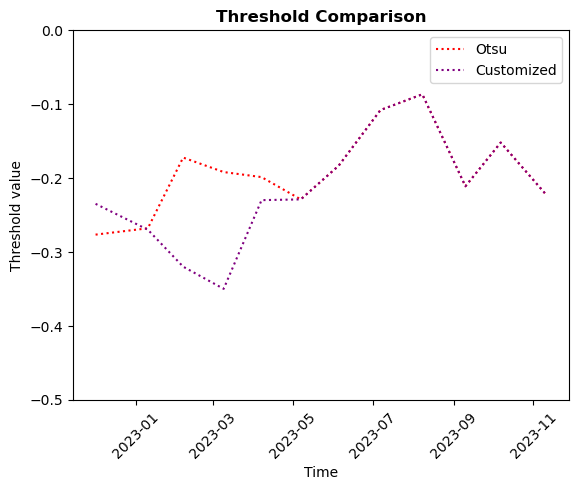

In [16]:
# plot original otsu threshold and final customized threshold:
plt.plot(area_df['Date'], area_df['Otsu'], linestyle='dotted', color='red')
plt.plot(area_df['Date'], area_df['Customized'], linestyle='dotted', color='purple')
plt.ylim(-0.5, 0)
plt.title('Threshold Comparison', fontweight="bold")
plt.xlabel('Time')
plt.ylabel('Threshold value')
plt.xticks(rotation=45)
plt.legend(['Otsu', 'Customized'])
plt.show()

Comparison of the original Otsu thresholds and the final customized thresholds are shown in the table and the plot above. The Otsu thresholds performed well in extracting water pixels in dry months but tend to underestimate water presence during wet months when rivers are filled with shallow water. Therefore, customized thresholds were used from Dec 2022 to Apr 2023. Examples of comparison between inadequate Otsu threshold and customized threshold can be seen in the side-by-side binary images from the previous step. 

Threshold tuning is a process of balancing tradeoffs between omission and commission errors when drawing boundaries between water and non-water pixels. While increasing the magnitude of threshold can help include subtle water areas such as those blocked by vegetation along the riverbanks, it also introduces errors at places where smooth surfaces such as the dam were falsely included as water pixels. This error could be eliminated by masking out known non-water areas using the National Land Use Land Cover (LULC) dataset. It could also be improved by incorporating additional spectral indices and using more dynamic and robust buffer methods to help identify open water features and account for uncertainties at the edge of lakes and rivers, as employed by Hondula et al. (2021). 

__*Limitations and future directions*__

One limitation of this method comes from the quality of the PlanetScope imagery. In order to consume less quota, composite images were downloaded that stitched scenes together into a single output. In some cases, however, this generates small seam lines across the water bodies, along which the pixels had very low NDWI and were thus classified as land. While this negligible error is offset by the large water area in the study region, it could be more problematic if  high accuracy is required. Potential improvements can include obtaining individual scenes rather than composite images while keeping in mind of the available quota.  

The presence of thick clouds can impact the accurate delineation of surface water extent. In this project, several high-quality raw images satisfying the filter criteria ended up with low-quality binary images due to thick clouds being mis-identified as surface water areas, which were completely irremovable by adjusting thresholds. Even though none of these images were selected for this analysis, the options of usable images was very limited during the data selection process. This could be resolved by incorporating the Usable Data Masks available for PlanetScope, but it is noteworthy that as recently emerged assets, they are not available for certain percentage of the datasets due to errors in rectification (Planet, 2023). 

In addition, the use of the NDWI in this project represents only the basic approach to map surface water extent. It has shortcomings that introduce noise caused by certain land cover types such as man-made features, as in the case of misclassification of the dam. Future work should switch to improved water indices such as the modified NDWI (MNDWI), which uses a middle infrared (MIR) band instead of the NIR band (Xu, 2006). This can not only enhance the accuracy in extracting open surface water features, but it is also capable of eliminating errors caused by built-up areas (Xu, 2006). 

The spatial and temporal scope of this project can also be improved in the future. With sufficient time and quota availability, subsequent projects can look at surface water changes in other areas and at a finer temporal scale by selecting two or more images per month. It is also beneficial to include datasets from previous years so that historical conditions of surface water distribution can be mapped. It is also noticeable that surface water alone is not the only perfect proxy to understand water dynamics influencing elephant movements. Other variables, such as water volumes and depths, may also play a role. Hidden or very small water bodies that are undetectable by remote sensing imagery are also very possible water sources for elephants as they move along the borderline. 

Besides delineating seasonal changes of major water bodies, it is also critical to understand the migratory behavior of elephants. As “facultative partially migratory species”, only certain individuals of elephants will migrate, and this does not happen every year (Purdon et al. 2018). While recent studies revealed that anthropogenic structures such as fences, cropland, and urban settlements can restrain elephant migration (Huang et al. 2022), the movement patterns and the degrees to which population patches can be interconnected may also be impacted by their habitual nature. It is thus necessary to investigate whether elephants will choose to migrate across the large area even when there are continuous water sources and sufficient safe space. This will require additional ecological and behavioral surveys while combining up-to-date tracking data of individual elephants. Restoring corridors to connect isolated patches can be beneficial, but it requires thorough understanding of key resource distribution coupled with knowledge on the biology of this species. 

#### __*References*__

Blake, S., & Hedges, S. (2004). Sinking the flagship: the case of forest elephants in Asia and Africa. *Conservation Biology, 18*(5), 1191-1202. https://www.jstor.org/stable/3588987

Cooley, S. W., Smith, L. C., Stepan, L., & Mascaro, J. (2017). Tracking dynamic northern surface water changes with high-frequency planet CubeSat imagery. *Remote Sensing, 9*(12), 1306. doi: 10.3390/rs9121306

Halpert, M. S. & Bell, G. D. (1996). Climate Assessment for 1996. Climate Prediction Center, NCEP/NWS/NOAA, Washington, D.C. Retrieved from https://www.cpc.ncep.noaa.gov/products/assessments/assess_96/toc.html

Hondula, K. L., DeVries, B., Jones, C. N., & Palmer, M. A. (2021). Effects of using high resolution satellite‐based inundation time series to estimate methane fluxes from forested wetlands. *Geophysical Research Letters, 48*(6), e2021GL092556. doi: 10.1029/2021GL092556

Huang, R. M., Van Aarde, R. J., Pimm, S. L., Chase, M. J., & Leggett, K. (2022). Mapping potential connections between Southern Africa’s elephant populations. *Plos one, 17*(10), e0275791. doi: 10.1371/journal.pone.0275791

McFeeters, S. K. (1996). The use of the Normalized Difference Water Index (NDWI) in the delineation of open water features. *International Journal of Remote Sensing, 17*(7), 1425-1432. doi: 10.1080/01431169608948714

Planet. (2023). *UDM2*. Retrieved on Nov 24, 2023. https://developers.planet.com/docs/data/udm-2/

Planet Team (2017). *Planet Application Program Interface: In Space for Life on Earth*. San Francisco, CA. https://api.planet.com.

Purdon, A., Mole, M. A., Chase, M. J., & Van Aarde, R. J. (208). Partial migration in savanna elephant populations distributed across southern Africa. *Scientific Reports, 8*(1), 11331. doi: 10.1038/s41598-018-29724-9

Robson, A. S., Trimble, M. J., Purdon, A., Young-Overton, K. D., Pimm, S. L., & Van Aarde, R. J. (2017). Savanna elephant numbers are only a quarter of their expected values. *PloS one, 12*(4), e0175942. doi: 10.1371/journal.pone.0175942

Roever, C. L., Van Aarde, R. J., & Leggett, K. (2013). Functional connectivity within conservation networks: Delineating corridors for African elephants. *Biological Conservation, 157*, 128-135. doi: 10.1016/j.biocon.2012.06.025

Shrader, A. M., Pimm, S. L., & van Aarde, R. J. (2010). Elephant survival, rainfall and the confounding effects of water provision and fences. *Biodiversity and Conservation, 19*, 2235-2245. doi: 10.1007/s10531-010-9836-7

Van Aarde, R. J., & Jackson, T. P. (2007). Megaparks for metapopulations: addressing the causes of locally high elephant numbers in southern Africa. *Biological Conservation, 134*(3), 289-297. doi: 10.1016/j.biocon.2006.08.027

Xu, H. (2006). Modification of normalized difference water index (NDWI) to enhance open water features in remotely sensed imagery. *International Journal of Remote Sensing, 27*(14), 3025-3033. doi: 10.1080/01431160600589179